# IS735 - Module 3

## Using PRAW to Create Networks

This notebook contains examples for using web-based APIs (Application Programmer Interfaces) to download data from social media platforms.

This notebook focuses specifically on _Reddit_.

We will use this API to create a network from the Reddit data, focusing on who replied to whom.

In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt 

<hr>

Import `NetworkX` package

In [2]:
# First we need to make sure we have networkx installed...
# !pip install networkx

import networkx as nx

<hr>

## Reddit API

Reddit's API used to be the easiest to use since it did not require credentials to access data on its subreddit pages.
Unfortunately, this process has been changed, and developers now need to create a Reddit application on Reddit's app page located here: (https://www.reddit.com/prefs/apps/).

In [3]:
# First we need to make sure we have praw installed...
# !pip install praw

# For our first piece of code, we need to import the package 
# that connects to Reddit. Praw is a thin wrapper around reddit's 
# web APIs and works well

import praw

### Creating a Reddit Application
Go to https://www.reddit.com/prefs/apps/.
Scroll down to "create application", select "web app", and provide a name, description, and URL (which can be anything).

After you press "create app", you will be redirected to a new page with information about your application. Copy the unique identifiers below "web app" and beside "secret". These are your client_id and client_secret values, which you need below.

In [4]:
# Now we specify a "unique" user agent for our code
# This is primarily for identification, I think, and some
# user-agents of bad actors might be blocked
redditApi = praw.Reddit(client_id='P3y5wDWmFqEJ8A',
                        client_secret='sReJnw2xqq2ZYZBYgxae6pYp4H0',
                        user_agent='PL_SocialMedia')

### Accessing Reddit Comments

While you're never supposed to read the comments, for certain live streams or new and rising posts, the comments may provide useful insight into events on the ground or people's sentiment.
New posts may not have comments yet though.

Comments are attached to the post title, so for a given submission, you can pull its comments directly.

Note Reddit returns pages of comments to prevent server overload, so you will not get all comments at once and will have to write code for getting more comments than the top ones returned at first.
This pagination is performed using the MoreXYZ objects (e.g., MoreComments or MorePosts).

In [5]:
def recursive_node_adder(g, comment, parent_author):
    '''Recursively process comments and add them to the graph'''
    
    # Check if we have the node already in our graph
    if comment.author not in g.nodes:
        g.add_node(comment.author)
        
    # Create an edge between this comment author and the
    #  parent author
    g.add_edge(comment.author, parent_author)

    # Iterate through the comments
    for reply in comment.replies.list():
        if isinstance(reply, praw.models.MoreComments):
            continue
            
        # Recursively process this reply
        recursive_node_adder(g, reply, comment.author)

### Create and Populate the Graph

In [6]:
# Create an undirected graph
g = nx.Graph()


subreddit = "covid"

breadthCommentCount = 20

targetSub = redditApi.subreddit(subreddit)

submissions = targetSub.hot(limit=50)

for post in submissions:
    print (post.author, "-", post.title)
    
    # Check if we have the node already in our graph
    if post.author not in g.nodes:
        g.add_node(post.author)
    
    post.comment_limit = breadthCommentCount
    
    # Get the top few comments
    for comment in post.comments.list():
        
        # Skip MoreComment objects, which don't have authors
        if isinstance(comment, praw.models.MoreComments):
            continue
        
        # Recursively process this reply
        recursive_node_adder(g, comment, post.author)

ADROBLES2024 - /r/COVID has it's own chatroom! (If link doesn't work, check the sidebar.
mark1241 - Donald Trump Recovers From Covid-19, "Don't be afraid of COVID"
how_when_why_where - The White House’s Version of Contact Tracing
MarsupialElectrical8 - Coffin Dancers
The50centTourist - Does Anyone Else Think Trump Is Faking Covid?
Miniskrik - Trump says will leave hospital on Monday, "Don't be afraid of Covid."
Julie_Roys - Pastor Greg Laurie becomes the 12th person at the Rose Garden ceremony on Sept. 26 to test positive for COVID-19. Laurie also attended a prayer march the same day with the Vice President, Franklin Graham, and thousands of others.
White_Mlungu_Capital - What special treatment did Trump get to recover from covid so fast?
MickGhee - Trump Claims COVID Vaccine to be Released "Momentarily" in Latest Video
MrDrProfessorScience - Has anyone caught covid from food?
aeb526 - What were your first covid symptoms?
kaushiksridhar83 - “Lives or Livelihoods” – The social cost of C

### Export Graph

We export the graph using GraphML in `NetworkX`, so we can load it in other software later.

Note, we could use other formats here as well. GraphML is just convenient.

In [7]:
nx.write_graphml(g, "output.reddit.graphml", prettyprint=False)

### Draw the Graph

Now that we've made the graph, let's draw it using the layout algorithms in `NetworkX`.

_NOTE_: `NetworkX` is not meant for graph layouts. We only do this for illustrative purposes.

In [8]:
import matplotlib.pyplot as plt

In [9]:
# pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
print(len(g.nodes()))
print(len(g.edges()))

104
95


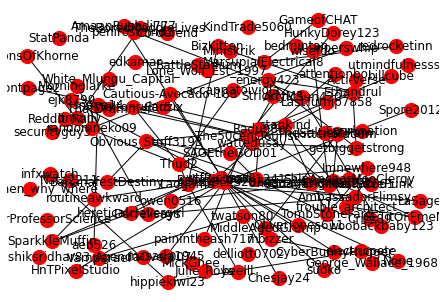

In [21]:
# Use the Spring layout algorithm
pos = nx.spring_layout(g, scale=200, iterations=5, k=0.2)

# And draw the graph with node labels
nx.draw(g, 
        pos, 
        node_color='red', 
        width=1, 
        with_labels=True,
        node_size=200)

In [15]:
print("Nodes:")
for node in g.nodes():
    print("\tNode:", node)
    
print("Edges:")
for edge in g.edges():
    print("\tEdge:", edge)

Nodes:
	Node: ADROBLES2024
	Node: mbizzer
	Node: CyberBunnyHugger
	Node: HnTPixelStudio
	Node: OliverJones611
	Node: Nata2211
	Node: ShipAnchorMooClergy
	Node: owen0516
	Node: StricklyM3
	Node: Spore2012
	Node: ejk8799
	Node: None
	Node: masada1945
	Node: Chesjay24
	Node: Cautious-Avocado-188
	Node: Reddit_Rally
	Node: AmaanRushdi777
	Node: suoko
	Node: Unusual_Engine8256
	Node: mark1241
	Node: Imnewhere948
	Node: TombStoneFaro
	Node: MustLovePunk
	Node: Obvious_Stuff3193
	Node: SAGEtheGOD01
	Node: BananafestDestiny
	Node: Radu98n
	Node: how_when_why_where
	Node: MarsupialElectrical8
	Node: The50centTourist
	Node: Sporknation
	Node: Waltonruler5
	Node: Thud2
	Node: HunkyDorey123
	Node: frontpage2
	Node: Miniskrik
	Node: Ethandrul
	Node: Julie_Roys
	Node: White_Mlungu_Capital
	Node: MickGhee
	Node: MrDrProfessorScience
	Node: aeb526
	Node: snene14
	Node: kaushiksridhar83
	Node: Cauzix
	Node: bedmintan
	Node: wtfRichard1
	Node: AmbassadorFlimsy
	Node: accappatoiviola
	Node: Co-defend
	No

In [22]:
# A dictionary with information for nodes
#  to which we will add attributes
node_attribute_dict = {
    0: {"label": "center"},
    5: {"label": "important"}
}

# Set the attributes
nx.set_node_attributes(g, node_attribute_dict)

# If you just print the data node list, you don't see the associated
#  attributes
print("Nodes without data:")
for node in g.nodes():
    print("\tNode:", node)
    
# Need to use the data=True named argument
print("Nodes w/ data:")
for node in g.nodes(data=True):
    print("\tNode:", node)

Nodes without data:
	Node: ADROBLES2024
	Node: mbizzer
	Node: CyberBunnyHugger
	Node: HnTPixelStudio
	Node: OliverJones611
	Node: Nata2211
	Node: ShipAnchorMooClergy
	Node: owen0516
	Node: StricklyM3
	Node: Spore2012
	Node: ejk8799
	Node: None
	Node: masada1945
	Node: Chesjay24
	Node: Cautious-Avocado-188
	Node: Reddit_Rally
	Node: AmaanRushdi777
	Node: suoko
	Node: Unusual_Engine8256
	Node: mark1241
	Node: Imnewhere948
	Node: TombStoneFaro
	Node: MustLovePunk
	Node: Obvious_Stuff3193
	Node: SAGEtheGOD01
	Node: BananafestDestiny
	Node: Radu98n
	Node: how_when_why_where
	Node: MarsupialElectrical8
	Node: The50centTourist
	Node: Sporknation
	Node: Waltonruler5
	Node: Thud2
	Node: HunkyDorey123
	Node: frontpage2
	Node: Miniskrik
	Node: Ethandrul
	Node: Julie_Roys
	Node: White_Mlungu_Capital
	Node: MickGhee
	Node: MrDrProfessorScience
	Node: aeb526
	Node: snene14
	Node: kaushiksridhar83
	Node: Cauzix
	Node: bedmintan
	Node: wtfRichard1
	Node: AmbassadorFlimsy
	Node: accappatoiviola
	Node: 

In [23]:
# A dictionary with information for edges
#  to which we will add attributes
edge_attribute_dict = {
    (0, 5): {"weight": 5},
    (6, 5): {"weight": 2}, # Note order is irrelevant for undirected graph
}

# Set the attributes
nx.set_edge_attributes(g, edge_attribute_dict)

# If you just print the data node list, you don't see the associated
#  attributes
print("Edges without data:")
for e in g.edges():
    print("\tEdge:", e)
    
# Need to use the data=True named argument
print("Edges w/ data:")
for e in g.edges(data=True):
    print("\tEdge:", e)

Edges without data:
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='mbizzer'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='HnTPixelStudio'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='OliverJones611'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='Nata2211'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='ShipAnchorMooClergy'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='StricklyM3'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='Spore2012'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='ejk8799'))
	Edge: (Redditor(name='ADROBLES2024'), None)
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='masada1945'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='Chesjay24'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='Cautious-Avocado-188'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='Reddit_Rally'))
	Edge: (Redditor(name='ADROBLES2024'), Redditor(name='AmaanRushdi777'))
	Edge: (Redditor(name='ADROB

In [24]:
# What is the degree of each node?
g.degree()

DegreeView({Redditor(name='ADROBLES2024'): 18, Redditor(name='mbizzer'): 2, Redditor(name='CyberBunnyHugger'): 2, Redditor(name='HnTPixelStudio'): 1, Redditor(name='OliverJones611'): 1, Redditor(name='Nata2211'): 1, Redditor(name='ShipAnchorMooClergy'): 2, Redditor(name='owen0516'): 2, Redditor(name='StricklyM3'): 1, Redditor(name='Spore2012'): 1, Redditor(name='ejk8799'): 1, None: 1, Redditor(name='masada1945'): 1, Redditor(name='Chesjay24'): 1, Redditor(name='Cautious-Avocado-188'): 1, Redditor(name='Reddit_Rally'): 1, Redditor(name='AmaanRushdi777'): 1, Redditor(name='suoko'): 1, Redditor(name='Unusual_Engine8256'): 1, Redditor(name='mark1241'): 7, Redditor(name='Imnewhere948'): 2, Redditor(name='TombStoneFaro'): 4, Redditor(name='MustLovePunk'): 1, Redditor(name='Obvious_Stuff3193'): 4, Redditor(name='SAGEtheGOD01'): 2, Redditor(name='BananafestDestiny'): 2, Redditor(name='Radu98n'): 5, Redditor(name='how_when_why_where'): 0, Redditor(name='MarsupialElectrical8'): 3, Redditor(name=

In [29]:
# What is the diameter of the graph?
nx.diameter(g)

NetworkXError: Found infinite path length because the graph is not connected

In [26]:
# What is the density of the graph?
nx.density(g)

0.017737117251680357

In [27]:
# What's the global clustering coefficient?
print("Global Coefficient:", nx.transitivity(g))

Global Coefficient: 0.13588850174216027


In [28]:
# Local Cluster Coeff for a given node
target = 0
print("Clustering Coefficient:", nx.clustering(g, target))

NetworkXError: nbunch is not a node or a sequence of nodes.

In [30]:
# What's the average LCC?
nx.average_clustering(g)

AttributeError: 'int' object has no attribute 'values'

In [31]:
# LCC Happens to be the same as the density of 1.5 ego-net w/o target
subg = nx.ego_graph(g, target, 1.5)

# Show the ego graph
nx.draw(subg, with_labels=True)
plt.show()

# Remove the target
subg.remove_node(target)

# show us the resulting graph
nx.draw(subg, with_labels=True)
plt.show()

# What's the density?
print("Density of 1.5-degree ego-net:", nx.density(subg))

NodeNotFound: Source 0 is not in G

In [32]:
# Degree centrality
centrality = nx.degree_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='ADROBLES2024'), 0.17475728155339804),
 (Redditor(name='Laogama'), 0.08737864077669902),
 (Redditor(name='mark1241'), 0.06796116504854369),
 (Redditor(name='The50centTourist'), 0.058252427184466014),
 (Redditor(name='Ethandrul'), 0.058252427184466014),
 (Redditor(name='Radu98n'), 0.04854368932038834),
 (Redditor(name='getbiggetstrong'), 0.04854368932038834),
 (Redditor(name='jamescarrot'), 0.04854368932038834),
 (Redditor(name='TombStoneFaro'), 0.038834951456310676),
 (Redditor(name='Obvious_Stuff3193'), 0.038834951456310676),
 (Redditor(name='Thud2'), 0.038834951456310676),
 (Redditor(name='AmbassadorFlimsy'), 0.038834951456310676),
 (Redditor(name='energy423'), 0.038834951456310676),
 (Redditor(name='wattedusay'), 0.038834951456310676),
 (Redditor(name='kittenofd00m'), 0.038834951456310676),
 (Redditor(name='MarsupialElectrical8'), 0.029126213592233007),
 (Redditor(name='wtfRichard1'), 0.029126213592233007),
 (Redditor(name='SparkkleMuffin'), 0.029126213592233007),
 (

In [33]:
# Closeness centrality
centrality = nx.closeness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='ADROBLES2024'), 0.17475728155339806),
 (Redditor(name='mbizzer'), 0.09251856082238721),
 (Redditor(name='CyberBunnyHugger'), 0.09251856082238721),
 (Redditor(name='ShipAnchorMooClergy'), 0.09251856082238721),
 (Redditor(name='owen0516'), 0.09251856082238721),
 (Redditor(name='HnTPixelStudio'), 0.089875173370319),
 (Redditor(name='OliverJones611'), 0.089875173370319),
 (Redditor(name='Nata2211'), 0.089875173370319),
 (Redditor(name='StricklyM3'), 0.089875173370319),
 (Redditor(name='Spore2012'), 0.089875173370319),
 (Redditor(name='ejk8799'), 0.089875173370319),
 (None, 0.089875173370319),
 (Redditor(name='masada1945'), 0.089875173370319),
 (Redditor(name='Chesjay24'), 0.089875173370319),
 (Redditor(name='Cautious-Avocado-188'), 0.089875173370319),
 (Redditor(name='Reddit_Rally'), 0.089875173370319),
 (Redditor(name='AmaanRushdi777'), 0.089875173370319),
 (Redditor(name='suoko'), 0.089875173370319),
 (Redditor(name='Unusual_Engine8256'), 0.089875173370319),
 (Redditor(n

In [34]:
# Betweenness centrality
centrality = nx.betweenness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[(Redditor(name='ADROBLES2024'), 0.028745478774033887),
 (Redditor(name='mark1241'), 0.018180087569008185),
 (Redditor(name='Radu98n'), 0.013896820864268038),
 (Redditor(name='TombStoneFaro'), 0.013706453455168476),
 (Redditor(name='Thud2'), 0.012944983818770227),
 (Redditor(name='Laogama'), 0.012659432705120884),
 (Redditor(name='jamescarrot'), 0.011422044545973729),
 (Redditor(name='The50centTourist'), 0.009518370454978107),
 (Redditor(name='LastTurnip7858'), 0.003236245954692557),
 (Redditor(name='Odd-Marionberry2661'), 0.003236245954692557),
 (Redditor(name='kittenofd00m'), 0.003236245954692557),
 (Redditor(name='accappatoiviola'), 0.00266514372739387),
 (Redditor(name='Obvious_Stuff3193'), 0.001237388159147154),
 (Redditor(name='Ethandrul'), 0.0006662859318484675),
 (Redditor(name='MarsupialElectrical8'), 0.0005711022272986865),
 (Redditor(name='AmbassadorFlimsy'), 0.0003807348181991243),
 (Redditor(name='Darrellsays'), 0.0003807348181991243),
 (Redditor(name='timzin'), 0.00019036

In [35]:
nx.set_node_attributes(g, centrality, "centrality")

print("Nodes:")
for node in g.nodes(data=True):
    print("\tNode:", node)

Nodes:
	Node: (Redditor(name='ADROBLES2024'), {'centrality': 0.028745478774033887})
	Node: (Redditor(name='mbizzer'), {'centrality': 0.0})
	Node: (Redditor(name='CyberBunnyHugger'), {'centrality': 0.0})
	Node: (Redditor(name='HnTPixelStudio'), {'centrality': 0.0})
	Node: (Redditor(name='OliverJones611'), {'centrality': 0.0})
	Node: (Redditor(name='Nata2211'), {'centrality': 0.0})
	Node: (Redditor(name='ShipAnchorMooClergy'), {'centrality': 0.0})
	Node: (Redditor(name='owen0516'), {'centrality': 0.0})
	Node: (Redditor(name='StricklyM3'), {'centrality': 0.0})
	Node: (Redditor(name='Spore2012'), {'centrality': 0.0})
	Node: (Redditor(name='ejk8799'), {'centrality': 0.0})
	Node: (None, {'centrality': 0.0})
	Node: (Redditor(name='masada1945'), {'centrality': 0.0})
	Node: (Redditor(name='Chesjay24'), {'centrality': 0.0})
	Node: (Redditor(name='Cautious-Avocado-188'), {'centrality': 0.0})
	Node: (Redditor(name='Reddit_Rally'), {'centrality': 0.0})
	Node: (Redditor(name='AmaanRushdi777'), {'cen

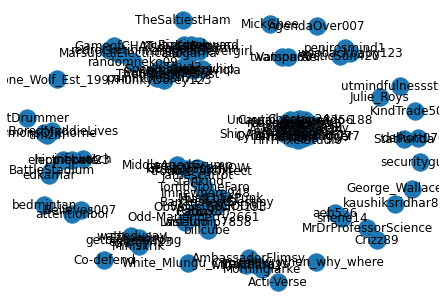

In [36]:
# Draw with a spring layout
nx.draw(g, with_labels=True)
plt.show()

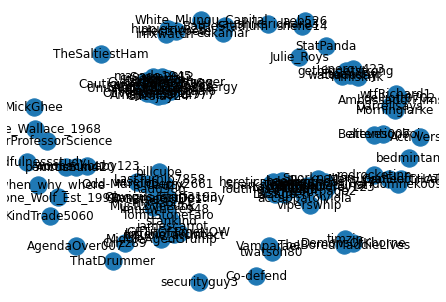

In [37]:
nx.draw_spring(g, with_labels=True)
plt.show()

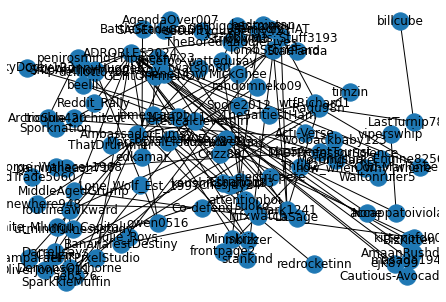

In [38]:
nx.draw_random(g, with_labels=True)
plt.show()

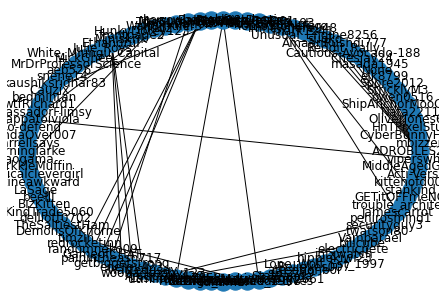

In [39]:
nx.draw_circular(g, with_labels=True)
plt.show()

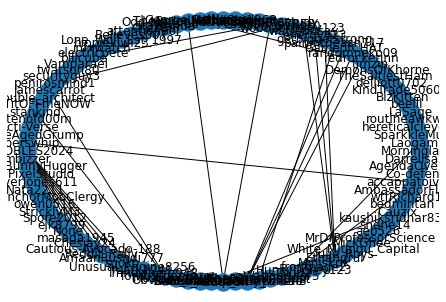

In [40]:
nx.draw_shell(g, with_labels=True)
plt.show()

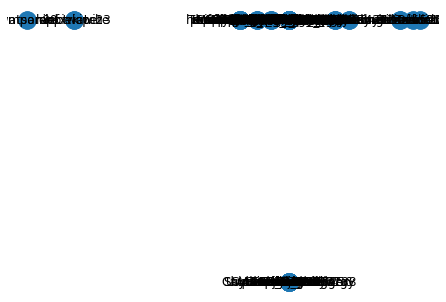

In [41]:
nx.draw_spectral(g, with_labels=True)
plt.show()

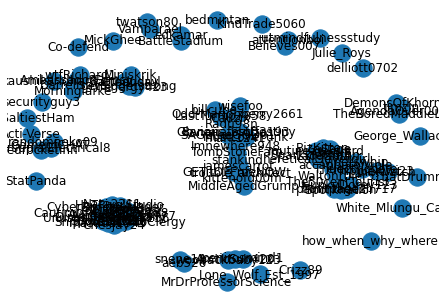

In [42]:
# Construct node positions using FR layout (as in Gephi)
node_positions = nx.fruchterman_reingold_layout(g)

# Draw with the given node positions specified
nx.draw(g, pos=node_positions, with_labels=True)
plt.show()

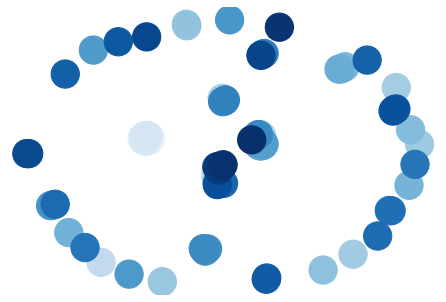

In [43]:
pos = nx.spring_layout(g, iterations=200)

# Randomly color
nx.draw(g, pos, node_color=range(len(g.nodes())), node_size=800, cmap=plt.cm.Blues)
plt.show()

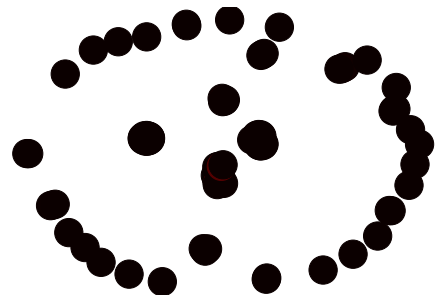

In [44]:
# Color by centrality
max_c = max(centrality.values())
color_map = {x[0]:x[1]/max_c for x in centrality.items()}

nx.draw(g, pos, node_color=list(color_map.values()), node_size=800, cmap=plt.cm.hot)
plt.show()

In [45]:
# For simplicity, let's use GraphML
nx.write_graphml(g, "covid.graphml")